<a href="https://colab.research.google.com/github/MochNad/PCVK_Ganjil_2023/blob/main/OCR_to_Bard_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **🍑 Instalasi Tesseract OCR dan Pustaka Python**

In [10]:
!sudo apt install tesseract-ocr
!pip install pytesseract opencv-python google-generativeai googletrans==4.0.0-rc1 gTTS

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


> # **🍑 Impor Modul dan Pustaka Python**

In [11]:
import io
import os
import time
import shutil
from base64 import b64decode
from IPython.display import display, Image as IPImage, Javascript, Audio
from google.colab import drive, files
from google.colab.output import eval_js
from googletrans import Translator
import cv2
import google.generativeai as palm
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from pytesseract import Output, pytesseract
from gtts import gTTS

> # **🍑 Menentukan Jalur Folder dan Jalur API**

In [3]:
drive.mount('/content/drive')

path_folder = '/content/drive/MyDrive/PCVK/assets/OCR Bard/'
path_api = path_folder  + 'api_key.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> # **🍑 Mengunggah dan Menyimpan Berkas**

In [59]:
uploaded_files = files.upload()

uploaded_filename = list(uploaded_files.keys())[0]

save_path = os.path.join(path_folder, 'question.jpg')
shutil.move(uploaded_filename, save_path)

Saving image-tesseract-15.png to image-tesseract-15.png


'/content/drive/MyDrive/PCVK/assets/OCR Bard/question.jpg'

> # **🍑 Mengambil dan Menyimpan Foto dari Kamera**

<IPython.core.display.Javascript object>

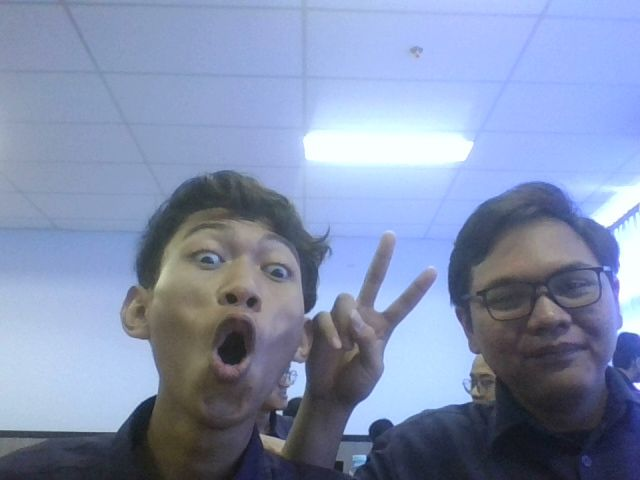

In [64]:
def take_photo(filename='question.jpg', quality=0.8, save_directory='images'):
    save_path = os.path.join(save_directory, filename)

    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');

            const video = document.createElement('video');
            video.style.display = 'block';

            const capture = document.createElement('button');
            capture.textContent = 'Capture';

            div.appendChild(video);
            div.appendChild(capture);

            document.body.appendChild(div);

            const stream = await navigator.mediaDevices.getUserMedia({ 'video': true });

            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getVideoTracks()[0].stop();
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
        ''')

    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])

    os.makedirs(save_directory, exist_ok=True)

    with open(save_path, 'wb') as f:
        f.write(binary)

    return save_path

image_path = take_photo(filename='question.jpg', save_directory=path_folder)

from IPython.display import Image
Image(filename=image_path)

> # **🍑 Mendeteksi dan Menampilkan Karakter pada Gambar**

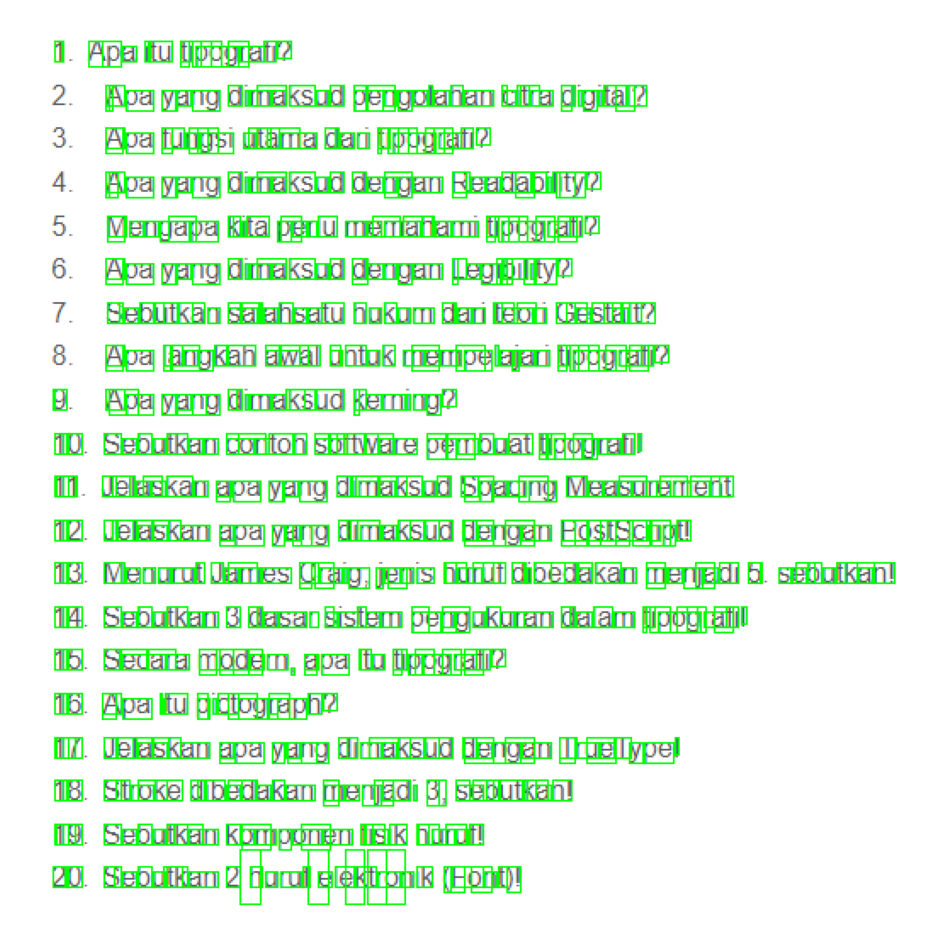

In [60]:
image = cv2.imread(path_folder + 'question.jpg')

h, w, c = image.shape

boxes = pytesseract.image_to_boxes(image)

for b in boxes.splitlines():
    b = b.split(' ')
    karakter_image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 1)

b, g, r = cv2.split(karakter_image)
karakter_img = cv2.merge([r, g, b])

plt.figure(figsize=(16, 12))
plt.imshow(karakter_img)
plt.axis('off')
plt.show()

> # **🍑 Mendeteksi dan Menampilkan Kata pada Gambar**

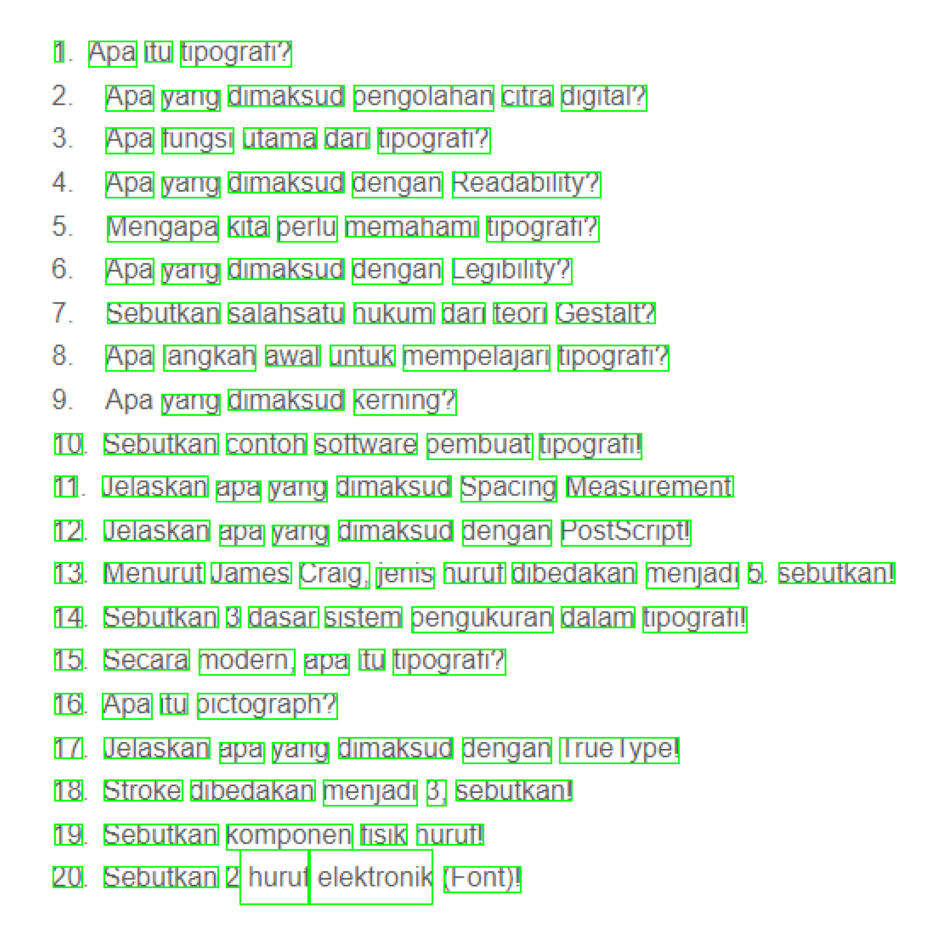

In [61]:
image = cv2.imread(path_folder + 'question.jpg')

d = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        kata_image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

b, g, r = cv2.split(kata_image)
kata_img = cv2.merge([r, g, b])

plt.figure(figsize=(16, 12))
plt.imshow(kata_img)
plt.axis('off')
plt.show()

> # **🍑 Menggunakan Tesseract untuk OCR pada Gambar**

In [62]:
image = cv2.imread(path_folder + 'question.jpg')

custom_config = r'-l eng --oem 3 --psm 6'

prompt = pytesseract.image_to_string(image, config=custom_config)

print("Hasil OCR\t:")
print(prompt)

Hasil OCR	:
1. Apa itu tipografi?

2. Apa yang dimaksud pengolahan citra digital?

3. Apa fungsi utama dari tipografi?

4. Apa yang dimaksud dengan Readability?

5. Mengapa kita perlu memahami tipografi?

6. Apa yang dimaksud dengan Legibility?

7. Sebutkan salahsatu hukum dari teori Gestalt?

8. Apa langkah awal untuk mempelajari tipografi?

9. Apa yang dimaksud kerning?

10. Sebutkan contoh software pembuat tipografil

11. Jelaskan apa yang dimaksud Spacing Measurement
12. Jelaskan apa yang dimaksud dengan PostScript!

13. Menurut James Craig, jenis huruf dibedakan menjadi 5. sebutkan!
14. Sebutkan 3 dasar sistem pengukuran dalam tipografil
15. Secara modern, apa itu tipografi?

16. Apa itu pictograph?

17. Jelaskan apa yang dimaksud dengan TrueTypel

18. Stroke dibedakan menjadi 3, sebutkan!

19. Sebutkan komponen fisik hurufl

20. Sebutkan 2 huruf elektronik (Font)!



> # **🍑 Menggunakan Palm untuk Generate Text Berdasarkan Hasil OCR**

In [63]:
with open(path_api, 'r') as file:
    api_key = file.read().strip()

palm.configure(api_key=api_key)

models = [m for m in palm.list_models() if 'generateText' in m.supported_generation_methods]
model = models[0].name

translator = Translator()
translated_text = translator.translate(prompt, src='id', dest='en').text

completion = palm.generate_text(
    model=model,
    prompt=translated_text,
    temperature=0,
    max_output_tokens=None,
)

translated_result = translator.translate(completion.result, src='en', dest='jw').text.replace("*", "")

print("Soal\t:")
print(prompt)
print("\nJawab\t:")
print(translated_result)

def text_to_speech(text, language='jw', slow=False):
    tts = gTTS(text=text, lang=language, slow=False)

    tts.save(path_folder + "answer.mp3")

    return Audio(path_folder + "answer.mp3", autoplay=True)

soal = "Soal " + prompt
text = "Jawab " + translated_result
text_to_speech(soal + text)

Soal	:
1. Apa itu tipografi?

2. Apa yang dimaksud pengolahan citra digital?

3. Apa fungsi utama dari tipografi?

4. Apa yang dimaksud dengan Readability?

5. Mengapa kita perlu memahami tipografi?

6. Apa yang dimaksud dengan Legibility?

7. Sebutkan salahsatu hukum dari teori Gestalt?

8. Apa langkah awal untuk mempelajari tipografi?

9. Apa yang dimaksud kerning?

10. Sebutkan contoh software pembuat tipografil

11. Jelaskan apa yang dimaksud Spacing Measurement
12. Jelaskan apa yang dimaksud dengan PostScript!

13. Menurut James Craig, jenis huruf dibedakan menjadi 5. sebutkan!
14. Sebutkan 3 dasar sistem pengukuran dalam tipografil
15. Secara modern, apa itu tipografi?

16. Apa itu pictograph?

17. Jelaskan apa yang dimaksud dengan TrueTypel

18. Stroke dibedakan menjadi 3, sebutkan!

19. Sebutkan komponen fisik hurufl

20. Sebutkan 2 huruf elektronik (Font)!


Jawab	:
1.  Typografi  yaiku seni lan teknik kanggo nggawe basa sing wis ditulis, apik, lan gampang diwaca.Iki kalebu p